In [ ]:
import pandas as pd
import tqdm
import numpy as np
import json

## Load file dataset mẫu

In [ ]:
file_path = '/kaggle/input/dataset-test/test_cmt.csv'
df = pd.read_csv(file_path)
df.head()

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


In [ ]:
df['label'] = df['sentiment'].apply(lambda x: 2 if x == 'positive' else (1 if x == 'neutral' else 0))

In [ ]:
df.head()

,textID,text,sentiment,label
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,1
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,2
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,0
3,01082688c6,happy bday!,positive,2
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,2


In [ ]:
!pip install transformers

In [ ]:
from transformers import pipeline, AutoTokenizer

## Sử dụng 3 model gán nhãn cho tập data mẫu và so sánh với kết quả đã được gán trước để đánh giá độ chính xác

### Model Roberta

In [ ]:
# Load the pipeline for sentiment analysis
pipe = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-sentiment", device=0)

# Get the tokenizer associated with the pipeline
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

# Assuming your text data is in a column named 'text'
# Create a new column 'sentiment' with the analysis results
# {"NEGATIVE": 0, "NEUTRAL": 1, "POSITIVE": 2}
label_to_num = {"LABEL_0": 0, "LABEL_1": 1, "LABEL_2": 2}

# Áp dụng pipeline và chuyển nhãn thành số
df['sentiment_label'] = df['text'].apply(
    lambda x: label_to_num[pipe(x, truncation=True, max_length=512)[0]['label']]
)

In [ ]:
df.head()

,textID,text,sentiment,label,sentiment_label
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,1,1
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,2,2
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,0,0
3,01082688c6,happy bday!,positive,2,2
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,2,2


In [ ]:
from sklearn.metrics import accuracy_score

# Tính accuracy
accuracy = accuracy_score(df['label'], df['sentiment_label'])
print("Accuracy:", accuracy)

Accuracy: 0.7178834182229767


In [ ]:
accuracy = (df['label'] == df['sentiment_label']).mean()
print("Accuracy:", accuracy)

Accuracy: 0.7178834182229767


### Model Bert

In [ ]:
pipe1 = pipeline("text-classification", model="nlptown/bert-base-multilingual-uncased-sentiment", device=0)

label_to_sentiment = {
    "1 star": 0,
    "2 stars": 0,
    "3 stars": 1,
    "4 stars": 2,
    "5 stars": 2
}


# Áp dụng pipeline và chuyển đổi nhãn
df['sentiment_label1'] = df['text'].apply(lambda x: label_to_sentiment[pipe1(x, truncation=True, max_length=512)[0]['label']])

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
df.head(20)

,textID,text,sentiment,label,sentiment_label,sentiment_label1
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,1,1,2
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,2,2,2
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,0,0,0
3,01082688c6,happy bday!,positive,2,2,2
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,2,2,2
5,726e501993,that`s great!! weee!! visitors!,positive,2,2,2
6,261932614e,I THINK EVERYONE HATES ME ON HERE lol,negative,0,0,0
7,afa11da83f,"soooooo wish i could, but im in school and my...",negative,0,0,0
8,e64208b4ef,and within a short time of the last clue all ...,neutral,1,1,0
9,37bcad24ca,What did you get? My day is alright.. haven`...,neutral,1,2,1


In [ ]:
accuracy = (df['label'] == df['sentiment_label1']).mean()
print("Accuracy:", accuracy)

Accuracy: 0.5325410299943407


### Model snowNLP

In [ ]:
!pip install joblib
!pip install snownlp

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 41.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for snownlp: filename=snownlp-0.12.3-py3-none-any.whl size=37760946 sha256=4c6fa5c68f36480579bf3136af2c19306861efb7521486311229555129f9f680
  Stored in directory: /root/.cache/pip/wheels/43/f3/70/8990fc249efeb396007766676706f71dd3d1ca3c023ce522ce
Successfully built snownlp


In [ ]:
from joblib import Parallel, delayed
from snownlp import SnowNLP

def classify_sentiment(text):
    s = SnowNLP(text)
    sentiment_score = s.sentiments
    if sentiment_score > 0.6:
        return '2' # Tích cực
    elif sentiment_score < 0.3:
        return '0' # Tiêu cực
    else:
        return '1' # Trung tính


# Sử dụng joblib để xử lý song song
def parallelize_dataframe(df, func, n_jobs=4):
    df_split = np.array_split(df, n_jobs)
    results = Parallel(n_jobs=n_jobs)(delayed(func)(sub_df)
                                      for sub_df in df_split)
    return pd.concat(results)


# Hàm phân tích cảm xúc
def apply_sentiment(df):
    df['sentiment_label2'] = df['text'].apply(classify_sentiment)
    return df


# Phân luồng xử lý dữ liệu
df = parallelize_dataframe(df, apply_sentiment, n_jobs=4)

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can eith

In [ ]:
df.head(20)

,textID,text,sentiment,label,sentiment_label,sentiment_label1,sentiment_label2
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,1,1,2,0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,2,2,2,0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,0,0,0,0
3,01082688c6,happy bday!,positive,2,2,2,1
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,2,2,2,0
5,726e501993,that`s great!! weee!! visitors!,positive,2,2,2,1
6,261932614e,I THINK EVERYONE HATES ME ON HERE lol,negative,0,0,0,0
7,afa11da83f,"soooooo wish i could, but im in school and my...",negative,0,0,0,0
8,e64208b4ef,and within a short time of the last clue all ...,neutral,1,1,0,2
9,37bcad24ca,What did you get? My day is alright.. haven`...,neutral,1,2,1,0


In [ ]:
accuracy = (df['label'] == df['sentiment_label2']).mean()
print("Accuracy:", accuracy)

Accuracy: 0.0


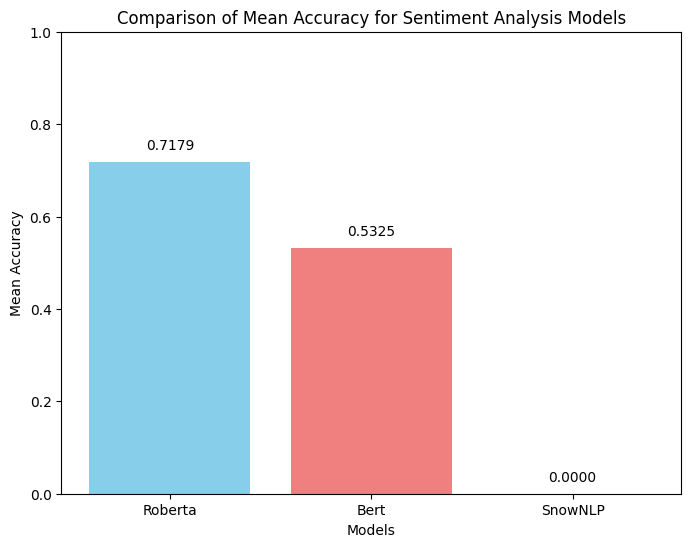

In [1]:
import matplotlib.pyplot as plt

models = ['Roberta', 'Bert', 'SnowNLP']
accuracy = [0.7178834182229767, 0.5325410299943407, 0.0]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracy, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Models")
plt.ylabel("Mean Accuracy")
plt.title("Comparison of Mean Accuracy for Sentiment Analysis Models")
plt.ylim(0, 1)

for i, v in enumerate(accuracy):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center', va='bottom')

plt.show()

## Nhận xét:
* Độ chính xác so với label đã được gán nhãn sẵn thì Roberta có độ chính xác cao nhất với xấp xỉ 0.72 và Bert với 0.53. Trong khi đó snowNLP cho ra kết quả không tốt với không dự đoán đúng nào.
* Lựa chọn mô hình Roberta để gán nhãn cho file comment và reply.